--- 1 ---

Herb and Salt-Rubbed Dry Brine Turkey
https://www.skinnytaste.com/wp-content/uploads/2019/04/icon-DF.png
225 Cals
2
0
0

This Herb and Salt-Rubbed Dry Brined Turkey comes out so moist and flavorful, with crispy golden skin and juicy tender meat.

Herb and Salt-Rubbed Dry Brine Turkey
Want an easy turkey recipe that’s moist and flavorful? Try dry brining! Rather than wet brining a turkey, dry brining is so much easier and less messy! This is how I am making my turkey again this year, my third year in a row! It takes 4 days to brine, but I am starting one day late (today) which is perfectly fine! And if you don’t need to make a whole turkey, you might love this stuffed turkey breast or this slow cooker turkey breast recipe.

['Dairy Free', 'Gluten Free', 'Keto Recipes', 'Kid Friendly', 'Low Carb', 'Whole 30 Recipes']
Baked Pumpkin Pasta with Pancetta, Gruyere, Kale, and White Beans
https://www.skinnytaste.com/wp-content/uploads/2021/11/Pumpkin-Pasta-with-Kale-12-260x390.jpg
47

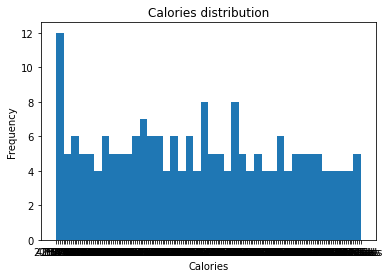

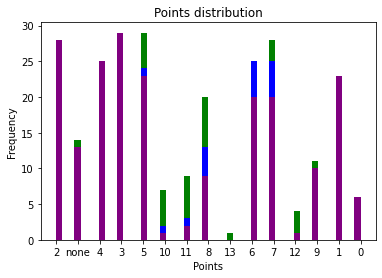

In [ ]:
from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://www.skinnytaste.com/page/' # url to the page

csv_file = open('Skinnytaste.csv', 'w', encoding = "utf-8", newline='') # creates a csv file called skinnytaste.csv
csv_writer = csv.writer(csv_file)   # allows writing in the csv file
csv_writer.writerow(['food_name', 'food_image', 'food_calories', 'green_point', 'blue_point', 'purple_point', 'summary', 'recipe_key']) # define the column names of the csv file


for page in range(1,31):        # loop to search for dishes of the first 30 pages
    print('---', page, '---')   # print current page

    source = requests.get(url + str(page)).text # requests current the webpage
    soup = BeautifulSoup(source, 'lxml')        # launches BeautifulSoup

    for Post in soup.find_all('article'):   # look for every article in the html
        food_name = Post.h2.text            # find name of food
        print(food_name)                    # print name of food
        
        try:
            food_image=Post.find('img')['data-lazy-src']    # find the url to the image of the food
            print(food_image)                               # print food url
        except:
            food_image = "none"                             # in case no image can be found, set the image as "none"

        try:
            food_calories = Post.find('span', class_='recipe-meta-value value-calories divider-right').text # find the calorie of the food
            print(food_calories)    # print calorie
        except:
            food_calories = "none"  # in case no calories can be found, set the calorie as "none"

        try:
            green_point = Post.find('span', class_='smart-points green').text   # find the amount of green points
            print(green_point)  # print out green points
        except:
            green_point = "none" # in case no points can be found, set points to "none"
        
        try:
            purple_point = Post.find('span', class_='smart-points purple').text # find the amount of purple points
            print(purple_point) # print out purple points
        except:
            purple_point = "none"   # in case no points can be found, set points to "none"

        try:
            blue_point = Post.find('span', class_='smart-points blue').text # find the amount of blue points
            print(blue_point)   # print out purple points
        except:
            blue_point = "none" # in case no points can be found, set points to "none"

        try:
            summary = Post.find('div', class_='post-content').text  # find the summary of the dishes
            print(summary)  # print out the summary
        except:
            summary = "none"    # if no summary can be found, set summary value to "none"

        recipe_key = [] # a list to save all the recipe keys for each dish
        for key in Post.find_all('span'):   # loop to search through all "span" tags 
            if key != None:                 # look only for avaiable key
                if key.find('img') != None: # look only for available "img" tag
                    found_key = key.find('img')['alt']  # the found key is being stored
                    recipe_key.append(found_key)        # the found key is being appended to the recipe key list
            else:
                pass
        print(recipe_key)      

        csv_writer.writerow([food_name, food_image, food_calories, green_point, blue_point, purple_point, summary, recipe_key]) #the collected data is being saved to their respective rows in the created csv file

csv_file.close()    # after the loop is done, the completed csv file will be closed



df = pd.read_csv('Skinnytaste.csv') # Visualisation of data

# Visulisation of calories
plt.hist(df['food_calories'], bins = 40)
plt.title('Calories distribution')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.plot()
plt.show()

# Visulisation of Points
plt.hist(df['green_point'], bins = 50, color = 'green')
plt.hist(df['blue_point'], bins = 50, color = 'blue')
plt.hist(df['purple_point'], bins = 50, color = 'purple')
plt.title('Points distribution')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.plot()
plt.show()